**mxnet60分钟入门Gluon教程，适合做过深度学习的人使用。入门教程地址：  
https://beta.mxnet.io/guide/getting-started/crash-course/index.html    
mxnet安装方法：pip install mxnet**

# 1 在mxnet中使用ndarray处理数据  
ndarray类似numpy,在mxnet下通过ndarray处理数据，ndarry类似与numpy。

In [1]:
# pip install -U mxnet 安装mxnet库
# 如
from mxnet import nd
# jupyter 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## Get started  
基本操作

In [2]:
# 建立2行3列的矩阵
nd.array(((1,2,3),(5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

In [3]:
# 建立2行3列的矩阵，用1填充
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [4]:
# 建立2行3列的矩阵，用随机数填充
y = nd.random.uniform(-1,1,(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [5]:
# 建立2行3列的矩阵，用2.0填充
x = nd.full((2,3), 2.0)
x


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [6]:
# 查看变量x的维度，大小，类型
(x.shape, x.size, x.dtype)

((2, 3), 6, numpy.float32)

## Operations  
运算

In [7]:
# 对应元素相乘
x * y


[[0.19525409 0.37137842 0.86075735]
 [1.377063   0.41105342 1.4317825 ]]
<NDArray 2x3 @cpu(0)>

In [8]:
# 返回e的y幂次方
y.exp()


[[1.1025515 1.204048  1.5378398]
 [1.9907899 1.2281718 2.0460093]]
<NDArray 2x3 @cpu(0)>

In [9]:
# 将y转置后进行x,y矩阵乘法
nd.dot(x, y.T)


[[1.4273899 3.219899 ]
 [1.4273899 3.219899 ]]
<NDArray 2x2 @cpu(0)>

## indexing  
切片

In [10]:
# 读取第2第3个数的值，nd序号从0开始
y[1,2]


[0.71589124]
<NDArray 1 @cpu(0)>

In [11]:
# 读取第2列到第3列的值
y[:,1:3]


[[0.18568921 0.43037868]
 [0.20552671 0.71589124]]
<NDArray 2x2 @cpu(0)>

In [12]:
# 读取第2列到第3列的值，并将赋值为4
y[:,1:3] = 4
y


[[0.09762704 4.         4.        ]
 [0.6885315  4.         4.        ]]
<NDArray 2x3 @cpu(0)>

## Converting between MXNet NDArray and NumPy  
mxnet的ndarry与numpy互相转换

In [13]:
# 将x转换为numpy格式
a = x.asnumpy()
(type(a), a)

(numpy.ndarray, array([[2., 2., 2.],
        [2., 2., 2.]], dtype=float32))

In [14]:
# 将numpy数组转换ndarray格式
nd.array(a)


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

# 2 通过mxnet的Gluon模块建立网络  
Gluon包是MXNet的高级封装接口，易于使用，同时保持了底层API的大部分灵活性。Gluon包为深入学习提供了一个清晰、简洁、简单的API。它使得在不牺牲训练速度的情况下，使得建立和训练深度学习模型更加容易。

In [15]:
from mxnet import nd
# 载入gluon包
from mxnet.gluon import nn

## Create your neural network’s first layer

In [16]:
# 建立输出节点为2的全连接层(dense层，类似keras)
layer = nn.Dense(2)
layer

Dense(None -> 2, linear)

In [17]:
# 使用默认的方法初始权重
layer.initialize()

In [18]:
# 生成3行4列的矩阵
x = nd.random.uniform(-1,1,(3,4))
# 输入x到layer层
layer(x)


[[ 0.0009278  -0.00674768]
 [-0.02683341  0.00671751]
 [ 0.00798804  0.02131375]]
<NDArray 3x2 @cpu(0)>

In [19]:
# 打印权重数据
layer.weight.data()


[[-0.01631819 -0.00312688  0.0408415   0.04370362]
 [ 0.00404529 -0.0028032   0.00952624 -0.01501013]]
<NDArray 2x4 @cpu(0)>

## Chain layers into a neural network

In [20]:
# 建立一个Sequential序贯模型
# nn.Sequential用法类似与nn.Dense，但都是nn.Block的子类
net = nn.Sequential()
# Add a sequence of layers.
# lenet，用到了卷积层，池化层，全连接层
net.add(# Similar to Dense, it is not necessary to specify the input channels
        # by the argument `in_channels`, which will be  automatically inferred
        # in the first forward pass. Also, we apply a relu activation on the
        # output. In addition, we can use a tuple to specify a  non-square
        # kernel size, such as `kernel_size=(2,4)`
        nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        # One can also use a tuple to specify non-symmetric pool and stride sizes
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        # The dense layer will automatically reshape the 4-D output of last
        # max pooling layer into the 2-D shape: (x.shape[0], x.size/x.shape[0])
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [21]:
# 初始化网络
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

In [22]:
# 输出第一层权重的维度以及第6层偏置的维度
(net[0].weight.data().shape, net[5].bias.data().shape)

((6, 1, 5, 5), (84,))

## Create a neural network flexibly  
通过nn.Block创建一个更加灵活的神经网络结构，主要有两部分：  
+ __ init __ create the layers 创建层  
+ forward define the forward function 确定前向传播层函数功能

In [23]:
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        # Run `nn.Block`'s init method
        super(MixMLP, self).__init__(**kwargs)
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
    def forward(self, x):
        y = nd.relu(self.blk(x))
        print(y)
        return self.dense(y)

net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

In [24]:
# 初始化网络
net.initialize()
x = nd.random.uniform(shape=(2,2))
net(x)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 2x4 @cpu(0)>



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 2x5 @cpu(0)>

In [25]:
# 打印权重
net.blk[1].weight.data()


[[-0.02634858  0.05334064  0.02748809]
 [ 0.06669661 -0.01711474  0.01647211]
 [-0.04485548  0.00594983 -0.06654498]
 [ 0.04964591 -0.06058505  0.03413684]]
<NDArray 4x3 @cpu(0)>

# 3 训练神经网络  
本节我们将导入数据，建立网络模型，并进行训练。最后通过matplotlib进行绘图和基准测试benchmarking

In [26]:
# Uncomment the following line if matplotlib is not installed.
# !pip install matplotlib

from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time

## Get data  
手写数字mnist数据集是深度学习中最常用的数据集之一。但要得到99%的准确度太简单了。这里我们使用了一个类似但稍微复杂的数据集，叫做FashionMNIST。目标不再是对数字进行分类，而是对服装类型进行分类。数据集可以通过Gluon的data.vision.datases模块自动下载。

In [27]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
#FashioniMMIST图像为28*28d的灰度图，y为类别标签
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

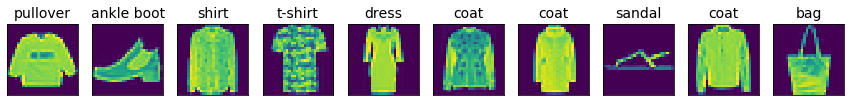

In [28]:
# text_labels为分类名
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
# 提取前十个数据
X, y = mnist_train[0:10]
# plot images
# 以png格式显示图片
display.set_matplotlib_formats('png')
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show();

为了将图像输入Gulon模型，我们用ToTensor将图像转换为浮点数据，同时对其进行标准化，标准化均值和方差分别为0.13和0.31

In [29]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_train = mnist_train.transform_first(transformer)

为了使得训练效果更好，我们将打乱数据，同时设定num_workers=4即四个线程来设置读取数据的进程数，目的是：用多进程加速数据的读取

In [30]:
batch_size = 256
train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

返回的train_data是一个包含图像和其对应标签的iterable object

In [31]:
# 打印数据
for data, label in train_data:
    print(data.shape, label.shape)
    break

(256, 1, 28, 28) (256,)


最后我们创建验证集数据

In [32]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
    batch_size=batch_size, num_workers=4)

## Define the model  
我们建立一个模型，用常用的Xavier法来初始化

In [33]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

In [34]:
# 定义loss
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [35]:
# 定义训练器，设定学习率为0.1
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

## Training

In [36]:
# 我们创造一个辅助函数来计算精度
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    # asscalar()表示返回值的标量
    return (output.argmax(axis=1) == label.astype('float32')).mean().asscalar()

In [37]:
# 训练网络2个epochs
for epoch in range(2):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        # 计算loss
        train_loss += loss.mean().asscalar()
        # 计算acc
        train_acc += acc(output, label)
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)
    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))

Epoch 0: loss 0.730, train acc 0.728, test acc 0.812, in 18.5 sec
Epoch 1: loss 0.463, train acc 0.828, test acc 0.856, in 18.6 sec


## Save the model

In [38]:
# 保存模型参数
net.save_parameters('net.params')

# 载入模型进行推理

## Prerequisites

In [39]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt

In [40]:
# 导入网络结构
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

In [41]:
# 导入模型
net.load_parameters('net.params')

## Predict

In [42]:
# 设置训练数据的处理信息
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

In [43]:
# 图像预测
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

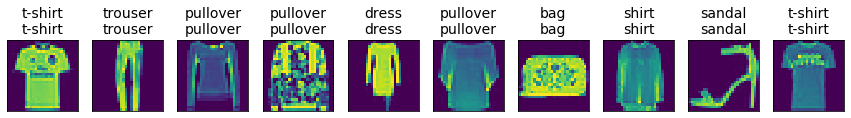

In [44]:
# 可视化预测结果
_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
display.set_matplotlib_formats('png')
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show();

## Predict with models from Gluon model zoo

In [45]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image
# 从预训练的Gluon模型预测图像
net = models.resnet50_v2(pretrained=True)

In [46]:
# 获得标签文件
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [47]:
# 随机下载狗的文件
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

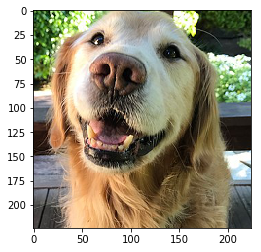

In [48]:
# 将获得的图像变为224大小
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show();

In [49]:
# 设置数据处理方式
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

In [50]:
# 结果分类，并输出top5结果
prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]))

With prob = 0.98240, it contains golden retriever
With prob = 0.00809, it contains English setter
With prob = 0.00262, it contains Irish setter, red setter
With prob = 0.00223, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00177, it contains Labrador retriever
